In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Module used for random choice from an iterable.
import random as r

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Module used for loading MNIST dataset
from tensorflow.keras.datasets import mnist

# Module used for building the CNN.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

# Module used for early stopping callback
import tensorflow as tf

# Module used for suppressing warning
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the MNIST dataset correctly
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


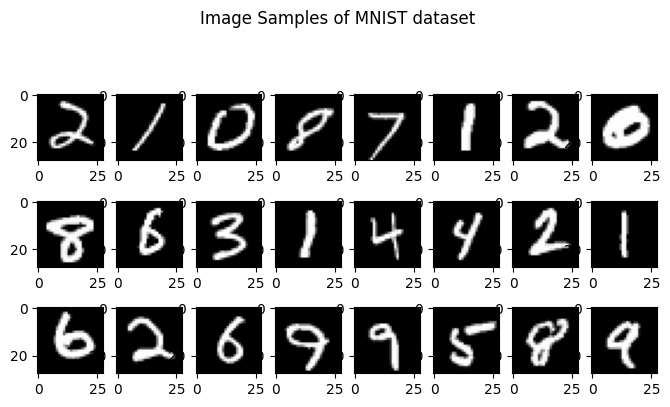

In [7]:
# Define the number of rows and columns for the grid layout
rows = 3
columns = 8

# Create a figure with subplots (3 rows × 8 columns)
fig, axs = plt.subplots(rows, columns, figsize=(8,8))

# Loop through each row and column to display random images
for i in range(rows):  # Iterate over rows
    for j in range(columns):  # Iterate over columns
        axs[i, j].imshow(r.choice(x_train), cmap='gray')  # Display a randomly chosen MNIST image in grayscale

# Add a title to the entire figure
fig.suptitle("Image Samples of MNIST Dataset")

# Adjust layout to ensure proper spacing of images and title
plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)  # Adjusts spacing between images

plt.show()


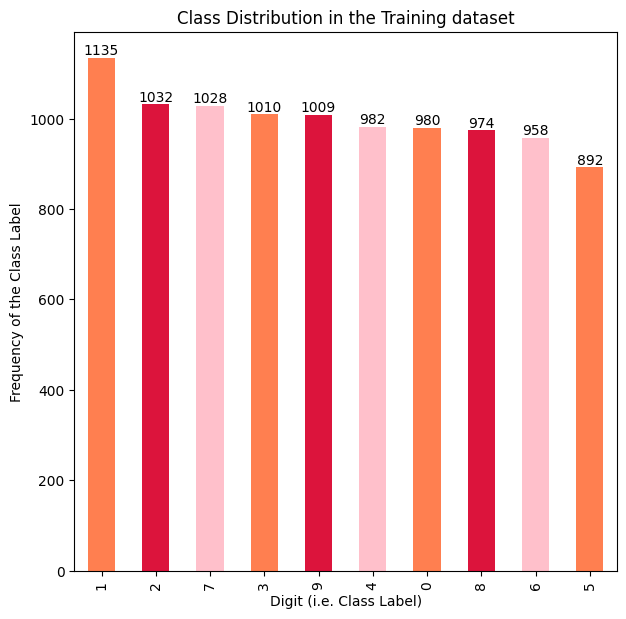

In [17]:
plt.figure(figsize=(7,7))
ax = pd.Series(y_test).value_counts().plot(kind="bar",
                                      color=["coral","crimson","pink"])
plt.title("Class Distribution in the Training dataset")
plt.xlabel("Digit (i.e. Class Label)")
plt.ylabel("Frequency of the Class Label")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [19]:
class CNN:

    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test  = x_test
        self.y_test  = y_test
        self.model = None
        self.history = None
        self.x_train_dim = None
        self.y_train_dim = None
        self.INPUT_SHAPE = (28,28,1)
        self.OUTPUT_SHAPE = 10

    def __get_expected_shape(self, data):
        return (data.shape[0], data.shape[1], data.shape[2], 1)

    def preprocess_data(self):
        self.x_train_dim = self.__get_expected_shape(self.x_train)
        self.x_test_dim = self.__get_expected_shape(self.x_test)
        self.x_train = self.x_train.reshape(self.x_train_dim)
        self.x_test  = self.x_test.reshape(self.x_test_dim)
        self.y_train = to_categorical(self.y_train, 10)
        self.y_test  = to_categorical(self.y_test, 10)

    def __add_dense_layer(self, units : int, activation : str):
        self.model.add(Dense(units,
                             activation=activation))

    def build_model(self):
        self.model=Sequential()
        self.model.add(Conv2D(320,(3,3),
                       activation='relu',
                       input_shape=self.INPUT_SHAPE))
        self.model.add(MaxPool2D(2,2))
        self.model.add(Flatten())
        self.__add_dense_layer(100, "relu")
        self.__add_dense_layer(self.OUTPUT_SHAPE, "softmax")
        self.model.summary()
        self.model.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

    def fit_model(self):
        self.history = self.model.fit(self.x_train,
                                      self.y_train,
                                      epochs=20,
                                      batch_size=32,
                                      verbose=1,
                                      validation_data=(self.x_test, self.y_test),
                                      callbacks=[ # this will prevent the model from overfitting
                                      tf.keras.callbacks.EarlyStopping(
                                        monitor='val_loss',
                                        patience=3,
                                        restore_best_weights=True)
                                      ])

    def plot_history(self,title):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

    def evaluate_model(self):
        print("Test Dataset Loss: ", self.history.history['val_loss'])
        print("Test Dataset Accuracy: ",self.history.history['val_accuracy'])

In [20]:
mnist_cnn = CNN(x_train, y_train, x_test, y_test)

In [21]:
mnist_cnn.preprocess_data()

In [22]:
mnist_cnn.build_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 320)         │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 320)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 54080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       5,408,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,412,310 (20.65 MB)

 Trainable params: 5,412,310 (20.65 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
mnist_cnn.fit_model()

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 293s 155ms/step - accuracy: 0.8946 - loss: 3.7909 - val_accuracy: 0.9689 - val_loss: 0.1050
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 139ms/step - accuracy: 0.9792 - loss: 0.0692 - val_accuracy: 0.9765 - val_loss: 0.0830
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 265s 140ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9781 - val_loss: 0.0746
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 317s 138ms/step - accuracy: 0.9883 - loss: 0.0358 - val_accuracy: 0.9767 - val_loss: 0.0873
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 253s 135ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9776 - val_loss: 0.1054
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 269s 139ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9769 - val_loss: 0.1085


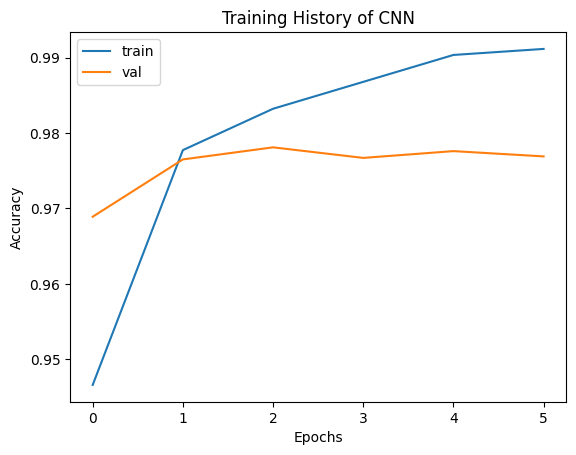

In [24]:
mnist_cnn.plot_history("Training History of CNN")